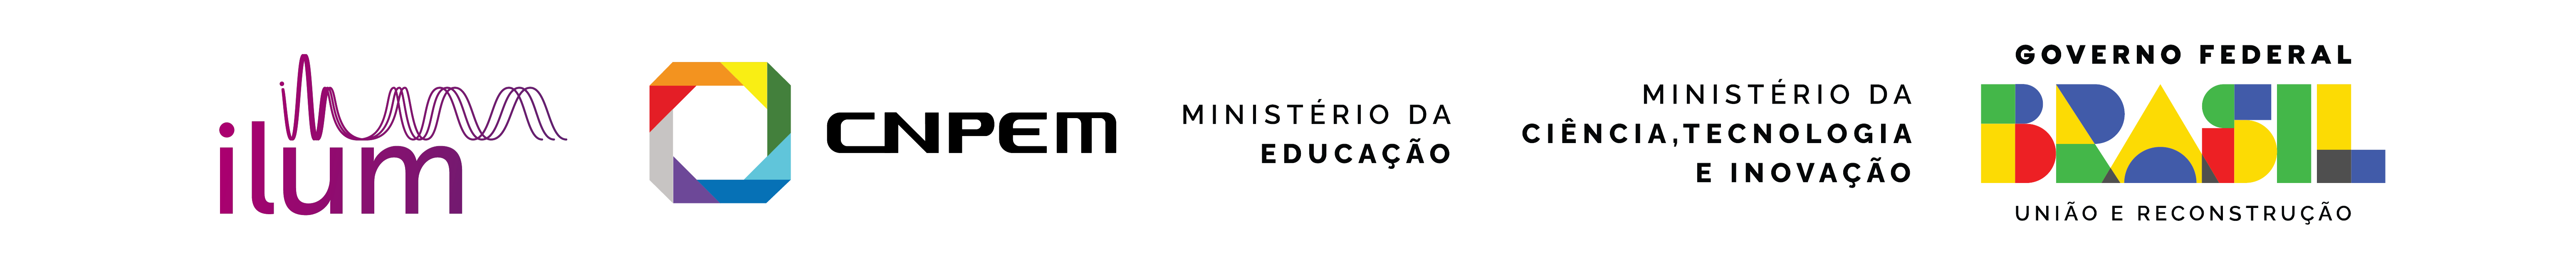

## <center> Fera formidável 4.12 - <i> Encontrando palíndromos</i>
<b> Disciplina: </b> Redes Neurais e Algoritmos Genéticos <br>
<b> Professor: </b> Daniel Cassar <br>
<b> Semestre: </b> 2025.1 <br>
<b> Aluna(o): </b> Gabriel Martins e Letícia Almeida Nunes <br>
<b> RM: </b> 24036 e 24013 <br>

---

### Objetivo
Encontre pelo menos 10 palíndromos diferentes de 5 letras. Estes palíndromos devem ter pelo menos uma vogal. Não é necessário que eles formem palavras válidas em português ou qualquer outro idioma.

In [1]:
import random
from pprint import pprint
from string import ascii_lowercase, ascii_uppercase, digits

from funcoes_4b import populacao_palavras as cria_populacao
from funcoes_4b import funcao_objetivo_pop_palindromo as funcao_objetivo
from funcoes_4b import selecao_torneio_max as funcao_selecao
from funcoes_4b import cruzamento_uniforme as funcao_cruzamento
from funcoes_4b import mutacao_simples as funcao_mutacao1
from funcoes_4b import mutacao_salto as funcao_mutacao2

O script `funcoes_4b` foi adapatado a partir do script desenvolvido pelo Prof. Dr. Daniel R. Cassar ao longo das aulas da disciplina.

### Metodologia
Para resolver esse problema, usamos **recursão** para ir checando a palavra dos extremos até o centro, independente do tamanho, dando uma porcentagem para quantificar "o quão palíndromo" (**simétrica**) a palavra é.

Por exemplo, a palavra `arca` é 50% palíndromo, pois duas letras idênticas estão em posições simétricas. Já as palavras `pai`, `bolo` e `osso` são, respectivamente, 33.3%, 0.0% e 100% palíndromo. Perceba que palavras com um número ímpar de letras nunca serão 0% palíndromo, pois pelo menos a letra central será simétrica com ela mesma.

Assim, temos como objetivo encontrar palavras cuja simetria seja de 100%. 

Abaixo, é possível visualizar a função objetivo que foi adicionada no script.

Além disso, é importante ressaltar que o problema exige que pelo menos uma das letras do palíndromo seja uma vogal, portanto, adicionamos uma penalização na função objetivo: _se a palavra orginal não possuir qualquer vogal, então a porcentagem será de 1/tamanho_.

Por fim, ainda levando em conta a restrição das vogais, decidimos evoluir 10 populações simultaneamente para reduzir o número de gerações necessárias para encontrar os 10 palíndromos.

### Implementação
Primeiramente, vamos definir os parâmetros do nosso algoritmo genético e a senha real.

In [2]:
CARACTERES_POSSIVEIS = ascii_lowercase

TAMANHO_POPULACAO = 100
TAMANHO_PALAVRA = 5
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO1 = 0.025
CHANCE_DE_MUTACAO2 = 0.025
TAMANHO_TORNEIO = 3

Abaixo, vamos criar a população inicial de candidatos para o nosso problema.

In [3]:
populacoes = []
NUM_POPS = 10

for _ in range(NUM_POPS):
    populacao = cria_populacao(CARACTERES_POSSIVEIS, TAMANHO_PALAVRA, TAMANHO_POPULACAO)
    populacoes.append(populacao)

for i in range(len(populacoes[0])):
    print(i,"".join(populacoes[0][i]))

0 cajjl
1 emtjv
2 aeknm
3 lpomm
4 wwvco
5 hkgji
6 migxb
7 areiq
8 cjbay
9 ufwtp
10 qikwq
11 huvhb
12 dpkuz
13 wljea
14 uxhdp
15 hukzp
16 mihkr
17 sqijv
18 ycuqm
19 pjcfe
20 ijtaf
21 jginh
22 tuuow
23 vhots
24 aidmq
25 nxsta
26 akjlg
27 vfytu
28 yipao
29 xvkuh
30 uwrym
31 uvqgb
32 rciub
33 yrthu
34 ilvbj
35 qfucu
36 qapcb
37 ktnqe
38 dfzko
39 uuerw
40 peojc
41 iyvtg
42 mlurv
43 tbnwe
44 dzcqu
45 faqhb
46 znyal
47 pcwuf
48 mkjic
49 glibd
50 svysa
51 ntyeq
52 rewyl
53 eudjc
54 mpbme
55 phlru
56 todzp
57 mrnno
58 trsoy
59 ofihj
60 tactg
61 deoez
62 awcps
63 mmjov
64 ukyaj
65 evltw
66 imkoz
67 edvzy
68 mkopr
69 pcvud
70 dwofx
71 hivyd
72 iswnp
73 ahepc
74 mgumh
75 dbzuq
76 zprsi
77 nuswg
78 njagm
79 lxtue
80 vqacm
81 afadg
82 ucmny
83 liyyc
84 hkgaf
85 hwonr
86 jmuuw
87 ilaja
88 hzrex
89 pzovf
90 suquu
91 vbleq
92 dbdco
93 zosds
94 ltith
95 qbzef
96 badyw
97 btqri
98 elmin
99 ocjws


Com isso, podemos realizar os processos de seleção, cruzamento e mutação por algumas gerações até atingirmos o nosso objetivo (10 palíndromos distintos).

In [4]:
geracao = 0
candidatos = []

while len(candidatos) < 10:
    for populacao in populacoes:
        # Seleção
        fitness = funcao_objetivo(populacao, TAMANHO_PALAVRA)
        selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)

        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)

        # Mutação
        funcao_mutacao1(proxima_geracao, CHANCE_DE_MUTACAO1, list(CARACTERES_POSSIVEIS))
        funcao_mutacao2(proxima_geracao, CHANCE_DE_MUTACAO2, list(CARACTERES_POSSIVEIS))

        # Encerramento
        populacao = proxima_geracao
        geracao += 1

        fitness = funcao_objetivo(populacao, TAMANHO_PALAVRA)
        maior_fitness_observado = max(fitness)

        if maior_fitness_observado == 1.0:
            indice = fitness.index(maior_fitness_observado)
            candidato = ''.join(populacao[indice])  

            if candidato not in candidatos:
                candidatos.append(candidato)
                print(geracao, candidatos)

12 ['smums']
26 ['smums', 'qdudq']
27 ['smums', 'qdudq', 'bidib']
30 ['smums', 'qdudq', 'bidib', 'efvfe']
37 ['smums', 'qdudq', 'bidib', 'efvfe', 'nacan']
43 ['smums', 'qdudq', 'bidib', 'efvfe', 'nacan', 'xiqix']
69 ['smums', 'qdudq', 'bidib', 'efvfe', 'nacan', 'xiqix', 'turut']
73 ['smums', 'qdudq', 'bidib', 'efvfe', 'nacan', 'xiqix', 'turut', 'nkokn']
77 ['smums', 'qdudq', 'bidib', 'efvfe', 'nacan', 'xiqix', 'turut', 'nkokn', 'iuxui']
82 ['smums', 'qdudq', 'bidib', 'efvfe', 'nacan', 'xiqix', 'turut', 'nkokn', 'iuxui', 'tawat']


---
### Conclusão
Ao final da atividade, foi possível obter o resultado que queríamos, chegando a uma lista com 10 palíndromos distintos. Para isso, exploramos mais como arquitetar os dados, construir uma função objetivo adaptada a eles e evoluir múltiplos algoritmos em conjunto.

---
### Contribuição de cada membro
**Gabriel Martins:** Implementação e Revisão

**Letícia Nunes:** Implementação e Documentação.

---